# **LIVE CODE 2**

# INTRODUCTION

Nama  : Fitri Octaviani

Batch : HCK-006

# **Problem 1**

## Import Library

In [1]:
import numpy as np
import pandas as pd

## Vektor Cosine Similarity

Kalimat 1 : Julie loves me more than Linda loves me

Kalimat 2 : Jane likes me more than Julie loves me

Tabel yang berisikan frekuensi kaya yang muncul pada kedua kalimat

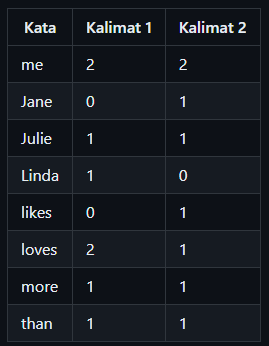

In [2]:
kalimat_1 = np.array ([2, 0, 1, 1, 0, 2, 1, 1])
kalimat_2 = np.array ([2, 1, 1, 0, 1, 1, 1, 1])

dot_product = kalimat_1 @ kalimat_2
cosine_sim = dot_product/(np.linalg.norm(kalimat_1) * np.linalg.norm(kalimat_2))

print ('Dot Product: ', dot_product)
print ('Cosine Similarity: ', cosine_sim)

Dot Product:  9
Cosine Similarity:  0.8215838362577491


### Jawaban dari pertanyaan

a.   Berdasarkan hasil perhitungan dari 
cosine similarity : kedua kalimat tersebut memiliki konteks yang serupa. Hal ini dibuktikan antara kalimat 1 dan kalimat 2 memiliki nilai cosine similarity 82,15% atau 0.8215 yang artinya mendekati 100% atau 1. Sehingga kedua vektor memiliki arah yang sangat mirip atau pola distribusi elemen yang serupa.

b. Makna cosine similarity yang bernilai 0 dan 1

  - Makna cosine similarity yang mendekati 1 itu menunjukkan bahwa kedua vektor memiliki arah yang sangat mirip atau pola distribusi elemen yang serupa.

  - Makna cosine similarity yang mendekati -1 itu menunjukkan bahwa kedua vektor memiliki arah yang sangat berlawanan atau pola distribusi elemen yang berbeda.

  - Makna cosine similarity yang mendekati 0 itu menunjukkan bahwa kedua vektor memiliki arah yang sangat tegak lurus atau tidak ada hubungan pola distribusi elemen.



c. Cosine similarity melibatkan vektor dikarenakan membandingkan kasus kesamaan dua item.

# **Problem 2**

## **SQL QUERY**


```
SELECT sale_dollars FROM `bigquery-public-data.iowa_liquor_sales.sales` LIMIT 5000
```



## Import Library

In [3]:
import pandas as pd
import numpy as np

## Data Loading

In [4]:
df = pd.read_csv ('/content/sample_data/h8dsft_P0LC3_Fitri Octaviani.csv')
df

,sale_dollars
0,7.40
1,8.45
2,7.40
3,7.40
4,378.00
...,...
4995,99.12
4996,99.12
4997,99.24
4998,99.12


In [5]:
# menampilkan sejumlah baris pertama dari atas dataset
df.head()

,sale_dollars
0,7.40
1,8.45
2,7.40
3,7.40
4,378.00


In [6]:
# menampilkan sejumlah baris dari bawah dataset
df.tail()

,sale_dollars
4995,99.12
4996,99.12
4997,99.24
4998,99.12
4999,99.24


## Central Tendency

In [7]:
# Menghitung mean
df1 = pd.DataFrame(df)
df1

print ('nilai mean : ', df1['sale_dollars'].mean())

nilai mean :  206.34913799999998


In [8]:
# Menghitung median
df1 = pd.DataFrame(df)
df1

print ('nilai median : ', df1['sale_dollars'].median())

nilai median :  121.56


In [9]:
# Menghitung mode
df1 = pd.DataFrame(df)
df1

print ('nilai mode : ', df1['sale_dollars'].mode())

nilai mode :  0    94.2
Name: sale_dollars, dtype: float64


## Skewness

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
df_col = df1.columns.tolist()
df_col

['sale_dollars']

In [12]:
def plot_dist(df1, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
    
    # histogram
    sns.histplot(df1[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df1[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df1[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df1[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df1[col].name + ' Kurtosis: ' + str(df1[col].kurt()))
    print(df1[col].name + ' Skewness: ' + str(df1[col].skew()))
    if -0.5 <= df1[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df1[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df1[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

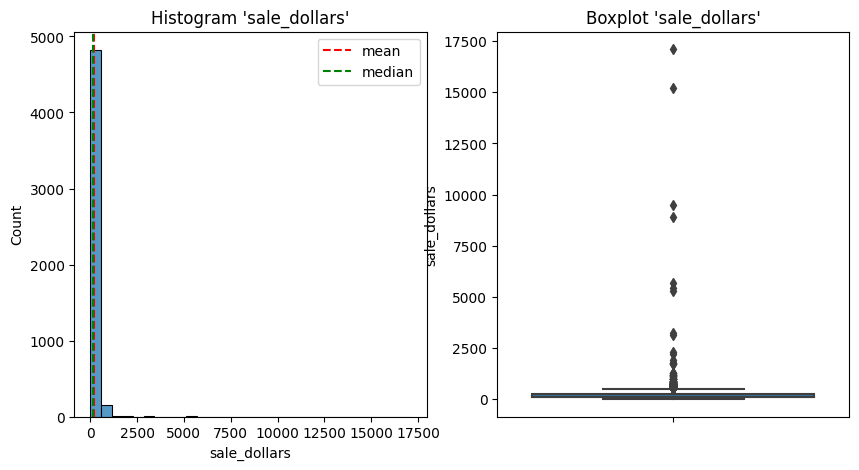

sale_dollars Kurtosis: 879.0691455300982
sale_dollars Skewness: 26.076658053454043
Columns 'sale_dollars' right skewed


In [13]:
# menampilkan histogram, boxplot, dan skewness
plot_dist(df1, df_col[0])

Data tidak berdistribusi normal

## Etreme Value Analysis

In [14]:
# menghitung quartile Q1, Q2, Q3
quartiles = np.percentile(df['sale_dollars'], [25, 50, 75])
quartiles

array([ 94.08, 121.56, 270.  ])

Q1 = 94.08

Q2 = 121.56

Q3 = 270

In [15]:
# menggunakan threshold 3 karena extreme skew
min_threshold = quartiles[0] -3 *(quartiles[1] - quartiles[0] )
max_threshold = quartiles[2] + 3 *(quartiles[1] - quartiles[0] )

print ('min threshold atau Lower : ', min_threshold)
print ('max threshold atau Upper : ', max_threshold)

min threshold atau Lower :  11.639999999999986
max threshold atau Upper :  352.44


## Handling Outlier atau menyimpan data yang sudah dibuang data anomalinya

Censoring outliers

In [16]:
outliers_max = df[(df1['sale_dollars']>= max_threshold)].index
outliers_min = df[(df1['sale_dollars']<= min_threshold)].index

In [17]:
df.iloc[outliers_max] = max_threshold
df.iloc[outliers_min] = min_threshold

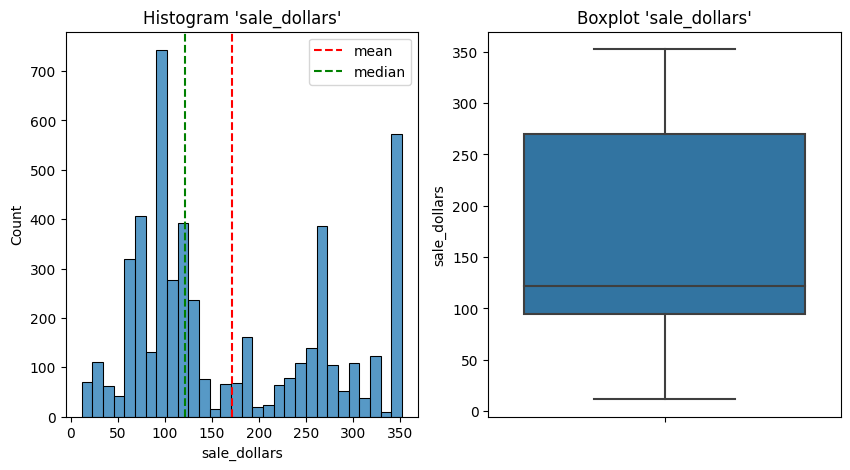

sale_dollars Kurtosis: -1.169269928850308
sale_dollars Skewness: 0.5131575891006778
Columns 'sale_dollars' right skewed


In [18]:
plot_dist(df, df_col[0])

In [19]:
s1 = pd.DataFrame(np.random.uniform(-1,0,5000), columns=['sale_dollars'])
s2 = pd.DataFrame(np.random.normal(3, 2.5, size=(1000, 1)),columns=['normal'])
data = pd.concat([s1, s2], axis=1)

In [20]:
data.head()

,sale_dollars,normal
0,-0.614686,-1.326556
1,-0.823237,2.268631
2,-0.380447,2.462507
3,-0.626782,1.632369
4,-0.517384,2.145138


### Jawaban dari pertanyaan

1. - Nilai mean  : 206.34913799999998
- Nilai median : 121.56
- Nilai modus : 94.2

2. Berdasarkan hasil pengecekan skewness, data tidak berdistribusi normal dikarenakan nilai skewness mencapai 26.076658053454043. Dalam skewness jika nilai kurang dari -1 atau lebih besar dari 1, datanya sangat miring. Dan dalam perhitungan pun columns 'sale_dollars' right skewed.

3. Teknik yang digunakan dalam extreme value analysis yang digunakan adalah censoring outliers dikarenakan outliers melebihi 5% dari data.